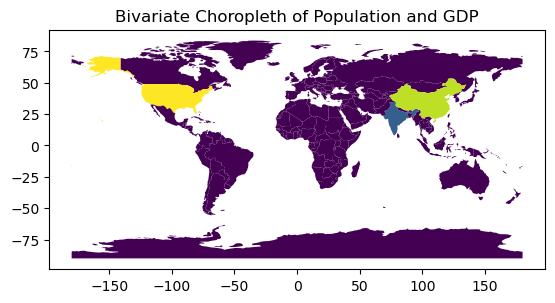

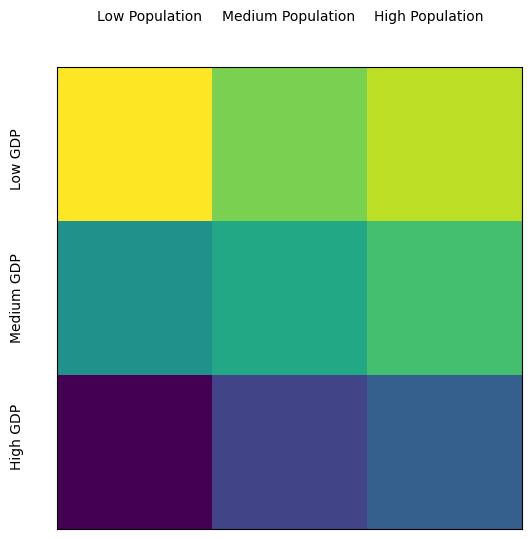

In [2]:
# Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Classify 'pop_est' into 3 classes
world['pop_class'] = pd.cut(world['pop_est'], bins=3, labels=[1, 2, 3])

# Classify 'gdp_md_est' into 3 classes
world['gdp_class'] = pd.cut(world['gdp_md_est'], bins=3, labels=[1, 2, 3])

# Create a new column 'Bi_Class'
world['Bi_Class'] = world['pop_class'].astype(str) + world['gdp_class'].astype(str)

# Create a color dictionary
color_dict = {'11': plt.cm.viridis(0), '12': plt.cm.viridis(0.5), '13': plt.cm.viridis(1.0),
              '21': plt.cm.viridis(0.2), '22': plt.cm.viridis(0.6), '23': plt.cm.viridis(0.8),
              '31': plt.cm.viridis(0.3), '32': plt.cm.viridis(0.7), '33': plt.cm.viridis(0.9)}

# Plot the bivariate choropleth map
world.plot(color=world['Bi_Class'].map(lambda x: color_dict[x]))
plt.title('Bivariate Choropleth of Population and GDP')

# Create a new figure and axes for the legend
fig, ax = plt.subplots(figsize=(6, 6))

# Add patches to the axes
for i in range(3):
    for j in range(3):
        ax.add_patch(patches.Rectangle((i/3, j/3), 1/3, 1/3, facecolor=color_dict[str(i+1)+str(j+1)]))

# Add labels
ax.text(-0.1, 0.8, 'Low GDP', va='center', rotation='vertical')
ax.text(-0.1, 0.5, 'Medium GDP', va='center', rotation='vertical')
ax.text(-0.1, 0.2, 'High GDP', va='center', rotation='vertical')
ax.text(0.2, 1.1, 'Low Population', ha='center')
ax.text(0.5, 1.1, 'Medium Population', ha='center')
ax.text(0.8, 1.1, 'High Population', ha='center')

# Adjust axes
ax.set_xticks([])
ax.set_yticks([])

# Show plot
plt.show()
